# 4) Object detection com deep learning

A YOLO é um sistema de detecção que tem o direcionamento para processamento em tempo real, existem atualmente 4 versões publicadas da YOLO, sendo a escolha para a reimplementação á yolo_v3. Abaixo está uma implementação baseada no artigo [link](https://machinelearningmastery.com/how-to-perform-object-detection-with-yolov3-in-keras/), a mesma carrega uma rede YOLOV3 pré-treinada, para realizar as detecções. 


- FPS
    - a
- Métrica de validação
- Métricas de treinamento


In [16]:
#!pip install --upgrade tensorflow tensorflow_probability
#!pip install tensorflow

In [2]:
#!pip uninstall tensorflow
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


Num GPUs Available:  0
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6225309644720785234
]


In [4]:
from  ml.YOLO_V3 import make_yolov3_model, WeightReader,BoundBox
# define the model
model = make_yolov3_model()
weight_reader = WeightReader('ml/yolov3.weights')
weight_reader.load_weights(model)
model.save('model.h5')

Using TensorFlow backend.


loading weights of convolution #0
loading weights of convolution #1
loading weights of convolution #2
loading weights of convolution #3
no convolution #4
loading weights of convolution #5
loading weights of convolution #6
loading weights of convolution #7
no convolution #8
loading weights of convolution #9
loading weights of convolution #10
no convolution #11
loading weights of convolution #12
loading weights of convolution #13
loading weights of convolution #14
no convolution #15
loading weights of convolution #16
loading weights of convolution #17
no convolution #18
loading weights of convolution #19
loading weights of convolution #20
no convolution #21
loading weights of convolution #22
loading weights of convolution #23
no convolution #24
loading weights of convolution #25
loading weights of convolution #26
no convolution #27
loading weights of convolution #28
loading weights of convolution #29
no convolution #30
loading weights of convolution #31
loading weights of convolution #32

img/coco_test/COCO_test2014_000000000001.jpg
truck 99.61769580841064
car 99.74437355995178
car 71.5816855430603
parking meter 95.19485831260681


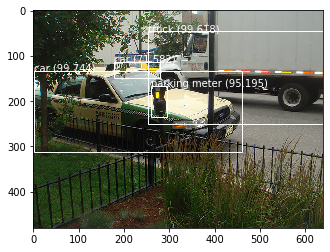

img/coco_test/COCO_test2014_000000000014.jpg
person 99.95794892311096
motorbike 96.59863710403442
person 99.95030164718628
skateboard 97.8758692741394


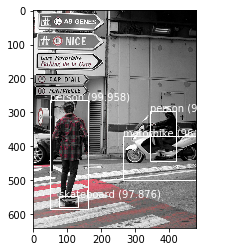

img/coco_test/COCO_test2014_000000000016.jpg
baseball bat 97.48378396034241
person 99.91900324821472
person 89.08076882362366
sports ball 95.11105418205261


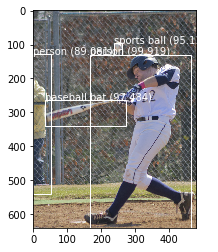

img/coco_test/COCO_test2014_000000000027.jpg
car 99.69216585159302
car 89.3868625164032


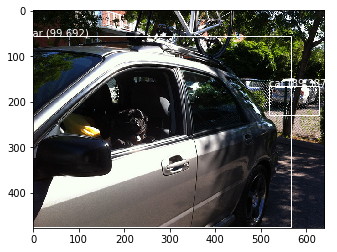

img/coco_test/COCO_test2014_000000000057.jpg
person 99.99390840530396
tennis racket 99.48869347572327
sports ball 97.76284098625183


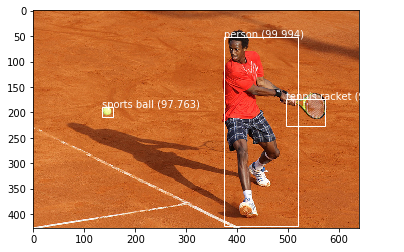

img/coco_test/COCO_test2014_000000000063.jpg
person 99.87617135047913
person 99.95057582855225
sports ball 88.89017701148987


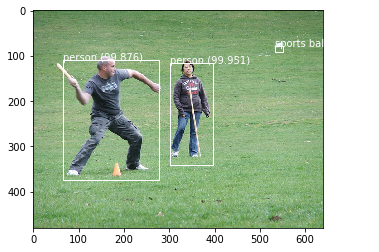

img/coco_test/COCO_test2014_000000000069.jpg
person 99.91348385810852
person 99.88166689872742
person 98.53259325027466
wine glass 98.94180297851562
wine glass 97.88581132888794
wine glass 99.68583583831787
bottle 74.8006522655487
bottle 73.60638380050659


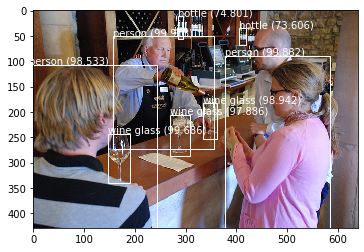

img/coco_test/COCO_test2014_000000000080.jpg
zebra 99.87956285476685


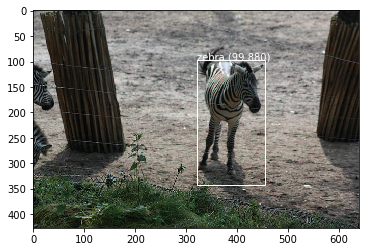

img/coco_test/COCO_test2014_000000000083.jpg
cat 90.32349586486816
dog 98.03508520126343


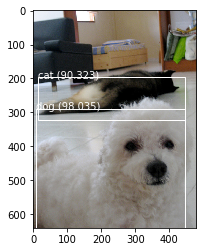

img/coco_test/COCO_test2014_000000000090.jpg
cow 82.19361305236816


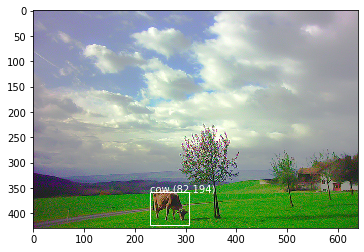

In [26]:
from  ml.YOLO_V3 import decode_netout,load_image_pixels,correct_yolo_boxes,do_nms,get_boxes,draw_boxes
import os
from IPython.display import clear_output
def calc_img(model,photo_filename):
    input_w, input_h = 416, 416
    image, image_w, image_h = load_image_pixels(photo_filename, (input_w, input_h))
    # make prediction
    yhat = model.predict(image)

    # define the anchors
    anchors = [[116,90, 156,198, 373,326], [30,61, 62,45, 59,119], [10,13, 16,30, 33,23]]
    # define the probability threshold for detected objects
    class_threshold = 0.7
    boxes = list()
    for i in range(len(yhat)):
        # decode the output of the network
        boxes += decode_netout(yhat[i][0], anchors[i], class_threshold, input_h, input_w)
    # correct the sizes of the bounding boxes for the shape of the image
    correct_yolo_boxes(boxes, image_h, image_w, input_h, input_w)
    # suppress non-maximal boxes
    do_nms(boxes, 0.5)
    # define the labels
    labels = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck",
            "boat", "traffic light", "fire hydrant", "stop sign", "parking meter", "bench",
            "bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe",
            "backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard",
            "sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard",
            "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana",
            "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake",
            "chair", "sofa", "pottedplant", "bed", "diningtable", "toilet", "tvmonitor", "laptop", "mouse",
            "remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator",
            "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"]
    # get the details of the detected objects
    v_boxes, v_labels, v_scores = get_boxes(boxes, labels, class_threshold)
    # summarize what we found
    for i in range(len(v_boxes)):
        print(v_labels[i], v_scores[i])
    # draw what we found
    draw_boxes(photo_filename, v_boxes, v_labels, v_scores)
    

path_bolt_images = 'img/coco_test/'
data_path = os.listdir(path_bolt_images)[:10]
for i in range(len(data_path)):
    photo_filename = path_bolt_images+data_path[i]
    print(photo_filename)
    # load and prepare image
    #clear_output(wait=True)
    calc_img(model,photo_filename)
    
